# Naloga 1: Kibergrad

In [107]:
import pandas as pd
import math
import numpy
from random import seed, randint
import matplotlib.pyplot as plt

In [108]:
Kibergrad = pd.read_csv("Kibergrad.csv")

### A naloga

In [109]:
Kibergrad

,tip,clanov,otrok,dohodek,cetrt,izobrazba
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
43881,1,5,3,30800,4,36
43882,1,2,0,16684,4,34
43883,1,2,0,12000,4,39
43884,1,2,0,50022,4,34


In [110]:
dohodki = Kibergrad.dohodek

In [111]:
x = numpy.quantile(dohodki, [0,0.25,0.5,0.75,1])

In [112]:
x

array([-22166.  ,  18300.  ,  34550.  ,  55827.75, 451887.  ])

In [113]:
q1 = x[1]
q3 = x[3]    #definiramo prvi in drugi kvartil

In [114]:
n = len(dohodki) #število vseh družin
n

43886

In [115]:
l = 2*(q3 - q1)/n**(1/3) #dolžina razreda

In [116]:
l

2127.8476148224045

In [117]:
l1 = 2 * 10**3  #zaokorzen l

In [118]:
n/l1

21.943

In [119]:
m = min(dohodki)
m

-22166

In [120]:
M = max(dohodki)
M

451887

In [121]:
Kibergrad_urejen = Kibergrad.sort_values('dohodek')
Kibergrad_urejen

,tip,clanov,otrok,dohodek,cetrt,izobrazba
42887,1,2,0,-22166,4,44
38562,1,2,0,-13599,4,39
38949,1,2,0,-9999,4,39
18091,1,4,2,-9798,2,43
41235,2,2,1,-9000,4,39
...,...,...,...,...,...,...
41665,1,5,0,365723,4,43
2245,1,2,0,369121,1,44
14876,1,2,0,379395,2,45
36607,1,2,0,449109,4,43


In [136]:
#sutvarimo seznam razredov
seznam = []
for i in range(1, 22):
    for j in range(1, 2001):
        seznam.append(i)

for i in range(1, 1887):
    seznam.append(22)

seznam

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [123]:
Kibergrad_urejen['razred'] = seznam

Kibergrad_urejen

,tip,clanov,otrok,dohodek,cetrt,izobrazba,razred
42887,1,2,0,-22166,4,44,1
38562,1,2,0,-13599,4,39,1
38949,1,2,0,-9999,4,39,1
18091,1,4,2,-9798,2,43,1
41235,2,2,1,-9000,4,39,1
...,...,...,...,...,...,...,...
41665,1,5,0,365723,4,43,22
2245,1,2,0,369121,1,44,22
14876,1,2,0,379395,2,45,22
36607,1,2,0,449109,4,43,22


In [124]:
povprecje_dohodkov = Kibergrad_urejen.groupby('razred').mean().dohodek

povprecje_dohodkov

razred
1       1946.122500
2       6518.397500
3       9828.753500
4      12758.290000
5      15563.769500
6      18377.033500
7      21195.946500
8      24154.054000
9      26929.422500
10     29948.404500
11     32989.849500
12     36252.405500
13     39626.682000
14     43179.003500
15     47102.228000
16     51348.160500
17     56074.025500
18     61756.179000
19     68929.429000
20     78912.387000
21     94845.802500
22    136573.366914
Name: dohodek, dtype: float64

<AxesSubplot:xlabel='razred'>

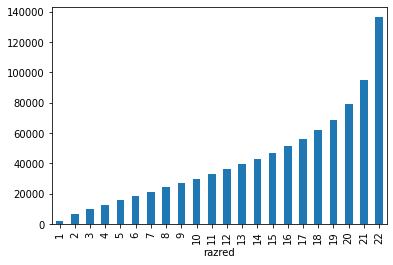

In [125]:
povprecje_dohodkov.plot.bar(x='razred', y='dohodek')

In [152]:
#seznam povprečji, ki ga bomo dodali v razpredelnico Kibergrad_urejen
povprecje = []
for j in range(21):
    for i in range(2000):
        n = povprecje_dohodkov.iloc[j]
        povprecje.append(n)
for j in range(1886):
    povprecje.append(povprecje_dohodkov.iloc[21])

povprecje[-1]

136573.3669141039

In [154]:
Kibergrad_urejen['povprecje'] = povprecje

Kibergrad_urejen

,tip,clanov,otrok,dohodek,cetrt,izobrazba,razred,povprecje
42887,1,2,0,-22166,4,44,1,1946.122500
38562,1,2,0,-13599,4,39,1,1946.122500
38949,1,2,0,-9999,4,39,1,1946.122500
18091,1,4,2,-9798,2,43,1,1946.122500
41235,2,2,1,-9000,4,39,1,1946.122500
...,...,...,...,...,...,...,...,...
41665,1,5,0,365723,4,43,22,136573.366914
2245,1,2,0,369121,1,44,22,136573.366914
14876,1,2,0,379395,2,45,22,136573.366914
36607,1,2,0,449109,4,43,22,136573.366914


(array([3.7000e+01, 1.2785e+04, 1.3841e+04, 9.0400e+03, 4.3090e+03,
        2.1020e+03, 9.1400e+02, 4.4000e+02, 2.0300e+02, 9.6000e+01,
        5.1000e+01, 2.8000e+01, 7.0000e+00, 1.4000e+01, 7.0000e+00,
        4.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00]),
 array([-22166.        ,   -618.13636364,  20929.72727273,  42477.59090909,
         64025.45454545,  85573.31818182, 107121.18181818, 128669.04545455,
        150216.90909091, 171764.77272727, 193312.63636364, 214860.5       ,
        236408.36363636, 257956.22727273, 279504.09090909, 301051.95454545,
        322599.81818182, 344147.68181818, 365695.54545455, 387243.40909091,
        408791.27272727, 430339.13636364, 451887.        ]),
 <BarContainer object of 22 artists>)

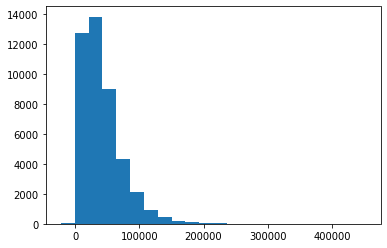

In [156]:
plt.hist(Kibergrad.dohodek, bins=22)

### B naloga

In [129]:
povprecje = Kibergrad.dohodek.mean()
povprecje

41335.50704096979

In [130]:
standardni_odklon = Kibergrad.dohodek.std()
standardni_odklon

32037.61941788666

In [131]:
# gostota normalne porazdelitve

def normalna(x, povprecje, standardni_odklon):
    return 1/ (povprecje*(2*math.pi)**0.5) * math.e**(-0.5*((x-povprecje)/standardni_odklon)**2)

In [132]:
normalna(0)

4.198653534282059e-06

In [ ]:
import statistics


# Plot the histogram.
plt.hist(Kibergrad.dohodek, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = numpy.linspace(xmin, xmax, 100)
p = norm.pdf(x, povprecje, standardni_odklon)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()